# Twitter Sentiment and Emotion Analysis

**Oihane Cantero, Julen Etxaniz and Jose Javier Saiz**

This corpus is a monolingual resource of unique tweets about product reviews, with each tweet paired with an adversarial sentence. Both original and adversarial tweets are manually and automatically annotated according to sentiment polarity (positive, negative, neutral). The objective is to compare and evaluate both types of annotation.

In [2]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 27.9 MB/s 
     |████████████████████████████████| 895 kB 50.1 MB/s 
     |████████████████████████████████| 6.8 MB 32.3 MB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
     |████████████████████████████████| 596 kB 54.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install tweepy --upgrade

     |████████████████████████████████| 66 kB 2.2 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/LAP/Subjects/BLR/Project/twitter-sentiment

/content/drive/MyDrive/LAP/Subjects/BLR/Project/twitter-sentiment


## Get Tweets

In [ ]:
import tweepy

with open("auth.txt") as f:
    bearer_token = f.read().split()[2]

client = tweepy.Client(bearer_token=bearer_token)
#Interests and Hobbies Vertical:Technology
query = 'context:65.848920371311001600 lang:en -is:retweet -is:quote -is:reply -has:links'
end_time = '2022-02-01T00:00:00Z'
# tweet_fields = ['context_annotations', 'entities', 'created_at']
tweet_fields = []

tweets = []
for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
                        tweet_fields=tweet_fields, end_time=end_time, max_results=100).flatten(limit=140):
    tweets.append(tweet)

In [ ]:
import pandas as pd
tweets_df = pd.DataFrame(tweets)
tweets_df

id                                               text
0    1488301060334759939  just put a CD into my MacBook to burn it and m...
1    1488301057650438144  oh yeah tesla well what about a car that just ...
2    1488301040160043008  #100DaysOfCode Haven’t updated in a while due ...
3    1488301015514288131  Finally managed to move my business email from...
4    1488301011865419780  why do I have to take a thermodynamics class w...
..                   ...                                                ...
135  1488299690810503169  Hey! I’d like to introduce a friend.\n\nPlease...
136  1488299665913171975  Day 31 ✅Done\n#100DaysOfCode\n\nFlash Card App...
137  1488299660447940613  i updated my mac and omg its the way it doesn'...
138  1488299656996167683              having no sort of WiFi actually sucks
139  1488299648976666628  What were your wins today? \n\nMine was FaceTi...

[140 rows x 2 columns]

In [ ]:
tweets_df.to_csv("data/tweets.csv", index_label = "index")

## Inter Annotator Agreement

In [94]:
from nltk.metrics.agreement import AnnotationTask

def get_ita_metrics(tweets_df_ita, task):
    data = []
    annotators = ["julen", "oihane", "javier"]
    for annotator in annotators:
        col = tweets_df_ita[task + "_" + annotator]
        data += [(annotator, str(i), str(val)) for i, val in enumerate(col)]

    task = AnnotationTask(data = data)

    agreement = []
    agreement.append(round(task.Ao("julen", "oihane") * 100, 1))
    agreement.append(round(task.Ao("julen", "javier") * 100, 1))
    agreement.append(round(task.Ao("javier", "oihane") * 100, 1))
    agreement.append(round(task.avg_Ao() * 100, 1))

    kappa = []
    kappa.append(round(task.kappa_pairwise("julen", "oihane") * 100, 1))
    kappa.append(round(task.kappa_pairwise("julen", "javier") * 100, 1))
    kappa.append(round(task.kappa_pairwise("javier", "oihane") * 100, 1))
    kappa.append(round(task.kappa() * 100, 1))

    return agreement, kappa

### First Annotation

In [95]:
tweets_df_ita = pd.read_csv("data/tweets_ita.csv", index_col="index")
tweets_df_ita

id  ... emotion_javier
index                       ...               
0      1488301060334759939  ...            joy
1      1488301057650438144  ...          anger
2      1488301040160043008  ...       optimism
3      1488301015514288131  ...       optimism
4      1488301011865419780  ...          anger
5      1488300967443451906  ...          anger
6      1488300951400243205  ...       optimism
7      1488300951182012417  ...       optimism
8      1488300944353857546  ...       optimism
9      1488300940767727620  ...            joy
10     1488300933138296835  ...            joy
11     1488300932811141122  ...            joy
12     1488300928964997122  ...       optimism
13     1488300923973783556  ...            joy
14     1488300921499095047  ...            joy
15     1488300904809963524  ...            joy
16     1488300900233973760  ...          anger
17     1488300886589943816  ...       optimism
18     1488300886115774464  ...       optimism
19     1488300863022002177  ...            joy

[20 rows x 8 columns]

In [96]:
pairs = ["julen oihane", "julen javier", "javier oihane", "average"]
agreement_sentiment, kappa_sentiment = get_ita_metrics(tweets_df_ita, "sentiment")
agreement_emotion, kappa_emotion = get_ita_metrics(tweets_df_ita, "emotion")

df_ita_results = pd.DataFrame({"pairs": pairs, "agreement_sentiment": agreement_sentiment,
                               "kappa_sentiment": kappa_sentiment, "agreement_emotion": agreement_emotion,
                               "kappa_emotion": kappa_emotion})

df_ita_results

pairs  agreement_sentiment  ...  agreement_emotion  kappa_emotion
0   julen oihane                 70.0  ...               55.0           33.3
1   julen javier                 60.0  ...               40.0           13.0
2  javier oihane                 60.0  ...               65.0           46.2
3        average                 63.3  ...               53.3           30.8

[4 rows x 5 columns]

In [99]:
df_ita_results.to_latex(index=False)

'\\begin{tabular}{lrrrr}\n\\toprule\n        pairs &  agreement\\_sentiment &  kappa\\_sentiment &  agreement\\_emotion &  kappa\\_emotion \\\\\n\\midrule\n julen oihane &                 70.0 &             53.8 &               55.0 &           33.3 \\\\\n julen javier &                 60.0 &             40.1 &               40.0 &           13.0 \\\\\njavier oihane &                 60.0 &             39.2 &               65.0 &           46.2 \\\\\n      average &                 63.3 &             44.4 &               53.3 &           30.8 \\\\\n\\bottomrule\n\\end{tabular}\n'

### Second Annotation

In [97]:
tweets_df_ita_2 = pd.read_csv("data/tweets_ita_2.csv", index_col="index")
tweets_df_ita_2

id  ... emotion_javier
index                       ...               
0      1488301060334759939  ...            joy
1      1488301057650438144  ...            joy
2      1488301040160043008  ...       optimism
3      1488301015514288131  ...       optimism
4      1488301011865419780  ...        sadness
5      1488300967443451906  ...          anger
6      1488300951400243205  ...            joy
7      1488300951182012417  ...            joy
8      1488300944353857546  ...            joy
9      1488300940767727620  ...            joy
10     1488300933138296835  ...       optimism
11     1488300932811141122  ...            joy
12     1488300928964997122  ...            joy
13     1488300923973783556  ...            joy
14     1488300921499095047  ...            joy
15     1488300904809963524  ...            joy
16     1488300900233973760  ...          anger
17     1488300886589943816  ...       optimism
18     1488300886115774464  ...            joy
19     1488300863022002177  ...       optimism

[20 rows x 8 columns]

In [98]:
pairs = ["julen oihane", "julen javier", "javier oihane", "average"]
agreement_sentiment, kappa_sentiment = get_ita_metrics(tweets_df_ita_2, "sentiment")
agreement_emotion, kappa_emotion = get_ita_metrics(tweets_df_ita_2, "emotion")

df_ita_2_results = pd.DataFrame({"pairs": pairs, "agreement_sentiment": agreement_sentiment,
                               "kappa_sentiment": kappa_sentiment, "agreement_emotion": agreement_emotion,
                               "kappa_emotion": kappa_emotion})

df_ita_2_results

pairs  agreement_sentiment  ...  agreement_emotion  kappa_emotion
0   julen oihane                 65.0  ...               70.0           49.2
1   julen javier                 70.0  ...               70.0           46.9
2  javier oihane                 55.0  ...               70.0           50.0
3        average                 63.3  ...               70.0           48.7

[4 rows x 5 columns]

In [100]:
df_ita_2_results.to_latex(index=False)

'\\begin{tabular}{lrrrr}\n\\toprule\n        pairs &  agreement\\_sentiment &  kappa\\_sentiment &  agreement\\_emotion &  kappa\\_emotion \\\\\n\\midrule\n julen oihane &                 65.0 &             45.1 &               70.0 &           49.2 \\\\\n julen javier &                 70.0 &             49.4 &               70.0 &           46.9 \\\\\njavier oihane &                 55.0 &             32.3 &               70.0 &           50.0 \\\\\n      average &                 63.3 &             42.3 &               70.0 &           48.7 \\\\\n\\bottomrule\n\\end{tabular}\n'

## Manual Annotation

In [ ]:
import pandas as pd
tweets_df = pd.read_csv("data/tweets.csv", index_col="index")
tweets_df

id  ... emotion_auto
index                       ...             
0      1488301060334759939  ...          NaN
1      1488301057650438144  ...          NaN
2      1488301040160043008  ...          NaN
3      1488301015514288131  ...          NaN
4      1488301011865419780  ...          NaN
...                    ...  ...          ...
135    1488299690810503169  ...          NaN
136    1488299665913171975  ...          NaN
137    1488299660447940613  ...          NaN
138    1488299656996167683  ...          NaN
139    1488299648976666628  ...          NaN

[140 rows x 6 columns]

## Automatic Analysis

https://arxiv.org/pdf/2010.12421.pdf

https://github.com/cardiffnlp/tweeteval

In [3]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Preprocess text (username and link placeholders)
def preprocess(tweets):
    new_tweets = []
    for text in tweets:
        new_text = []
        for t in text.split(" "):
            t = '@user' if t.startswith('@') and len(t) > 1 else t
            t = 'http' if t.startswith('http') else t
            new_text.append(t)
        new_tweets.append(" ".join(new_text))
    return new_tweets

# Get task parameters (sentiment or emotion)
def get_params(task):
    name = f"cardiffnlp/twitter-roberta-base-{task}"

    tokenizer = AutoTokenizer.from_pretrained(name)
    model = AutoModelForSequenceClassification.from_pretrained(name)

    # download label mapping
    labels=[]
    mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
    with urllib.request.urlopen(mapping_link) as f:
        html = f.read().decode('utf-8').split("\n")
        csvreader = csv.reader(html, delimiter='\t')
    labels = [row[1] for row in csvreader if len(row) > 1]

    return model, tokenizer, labels

# Predict task (sentiment or emotion)
def predict(text, model, tokenizer, labels, task):
    prep_text = preprocess(text)
    text_sents = []
    for text in prep_text:
        encoded_input = tokenizer(text, return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        ranking = np.argsort(scores)
        ranking = ranking[::-1]
        sents = {}
        sents[task] = labels[ranking[0]]
        for i in range(scores.shape[0]):
            sents[labels[ranking[i]]] = round(scores[ranking[i]], 3)
        text_sents.append(sents)
    return text_sents

### Sentiment

In [4]:
task = 'sentiment'
model_sentiment, tokenizer_sentiment, labels_sentiment = get_params(task)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [ ]:
sentiment = predict(list(tweets_df["text"]), model_sentiment, tokenizer_sentiment, labels_sentiment, task)
sent = [sent['sentiment'] for sent in sentiment]
tweets_df['sentiment_auto'] = sent

In [ ]:
tweets_df

id  ... emotion_auto
index                       ...             
0      1488301060334759939  ...          NaN
1      1488301057650438144  ...          NaN
2      1488301040160043008  ...          NaN
3      1488301015514288131  ...          NaN
4      1488301011865419780  ...          NaN
...                    ...  ...          ...
135    1488299690810503169  ...          NaN
136    1488299665913171975  ...          NaN
137    1488299660447940613  ...          NaN
138    1488299656996167683  ...          NaN
139    1488299648976666628  ...          NaN

[140 rows x 6 columns]

In [ ]:
tweets_df.to_csv("data/tweets.csv", index_label = "index")

### Emotion

In [5]:
task = 'emotion'
model_emotion, tokenizer_emotion, labels_emotion = get_params(task)

Downloading:   0%|          | 0.00/779 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [ ]:
emotion = predict(list(tweets_df["text"]), model_emotion, tokenizer_emotion, labels_emotion, task)
emot = [emot['emotion'] for emot in emotion]
tweets_df['emotion_auto'] = emot

In [ ]:
tweets_df

id  ... emotion_auto
index                       ...             
0      1488301060334759939  ...          joy
1      1488301057650438144  ...          joy
2      1488301040160043008  ...      sadness
3      1488301015514288131  ...     optimism
4      1488301011865419780  ...        anger
...                    ...  ...          ...
135    1488299690810503169  ...          joy
136    1488299665913171975  ...          joy
137    1488299660447940613  ...          joy
138    1488299656996167683  ...      sadness
139    1488299648976666628  ...          joy

[140 rows x 6 columns]

In [ ]:
tweets_df.to_csv("data/tweets.csv", index_label = "index")

## Adversarial Tweets

https://github.com/airbnb/artificial-adversary

In [ ]:
!pip install Adversary
!python -m textblob.download_corpora

     |████████████████████████████████| 56 kB 2.3 MB/s 
  Created wheel for Adversary: filename=Adversary-1.1.1-py3-none-any.whl size=55752 sha256=fe42c7acd17b2ecb4c78c0de37f59b1515716166d12d9bac08e5e4b7e5354fcd
  Stored in directory: /root/.cache/pip/wheels/52/d9/dc/3ac8760254ea731b5d88b73f8ed7018a8e022b5e1409a95dba
Successfully built Adversary
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data

In [ ]:
tweets_df_adv = pd.read_csv("data/tweets.csv", usecols=["id", "text"])

In [ ]:
from Adversary import Adversary

gen = Adversary(verbose=False, output=None)

attacks = ["swap_words", "remove_spacing", "letter_to_symbol", "swap_letters", "insert_punctuation", 
           "insert_duplicate_characters", "delete_characters", "change_case"]
           
for attack in attacks:
    tweets_adversarial = []
    for i, tweet in tweets_df_adv.iterrows():
        adversarial = gen.generate([tweet.text], attacks=[attack], random_seed=1)[0][0]
        tweets_adversarial.append(adversarial)
    tweets_df_adv["text_" + attack] = tweets_adversarial

In [ ]:
tweets_df_adv

id  ...                                   text_change_case
0    1488301060334759939  ...  just put a cd into my MacBook to burn it and m...
1    1488301057650438144  ...  oh yeah tesla well what about a cAR that just ...
2    1488301040160043008  ...  #100DaysOfCode HAVEN updated T a while due to ...
3    1488301015514288131  ...  Finally managed to MOVE my busineSs email from...
4    1488301011865419780  ...  why do I HAVE to takE a thermodynamics class w...
..                   ...  ...                                                ...
135  1488299690810503169  ...  Hey! I’d ’ to introduce a friend. Please FrIEN...
136  1488299665913171975  ...  Day 31 ✅Done #100DaysOfCode FlaSh Card App cAP...
137  1488299660447940613  ...  i updATED my mac and oMg its the way it doesn'...
138  1488299656996167683  ...              having no SORT of WiFI actually sucks
139  1488299648976666628  ...  What were your WINS todAy Mine was fACEtIMinG ...

[140 rows x 10 columns]

In [ ]:
tweets_df_adv.to_csv("data/tweets_adv.csv", index_label = "index")

### Sentiment

In [ ]:
tweets_df_adv_sent = pd.read_csv("data/tweets.csv", usecols=["id", "text", "sentiment_manual", "sentiment_auto"])
tweets_df_adv_sent

id  ... sentiment_auto
0    1488301060334759939  ...       positive
1    1488301057650438144  ...        neutral
2    1488301040160043008  ...        neutral
3    1488301015514288131  ...       positive
4    1488301011865419780  ...       negative
..                   ...  ...            ...
135  1488299690810503169  ...       positive
136  1488299665913171975  ...        neutral
137  1488299660447940613  ...       positive
138  1488299656996167683  ...       negative
139  1488299648976666628  ...       positive

[140 rows x 4 columns]

In [ ]:
task = 'sentiment'
for attack in attacks:
    sentiment = predict(list(tweets_df_adv["text_" + attack]), model_sentiment, tokenizer_sentiment, labels_sentiment, task)
    sent = [sent[task] for sent in sentiment]
    tweets_df_adv_sent[task + "_" + attack] = sent

In [ ]:
tweets_df_adv_sent

id  ... sentiment_change_case
0    1488301060334759939  ...              positive
1    1488301057650438144  ...               neutral
2    1488301040160043008  ...              positive
3    1488301015514288131  ...              positive
4    1488301011865419780  ...              negative
..                   ...  ...                   ...
135  1488299690810503169  ...              positive
136  1488299665913171975  ...               neutral
137  1488299660447940613  ...              positive
138  1488299656996167683  ...              negative
139  1488299648976666628  ...              positive

[140 rows x 12 columns]

In [ ]:
tweets_df_adv_sent.to_csv("data/tweets_adv_sent.csv", index_label = "index")

### Emotion

In [ ]:
tweets_df_adv_emot = pd.read_csv("data/tweets.csv", usecols=["id", "text", "emotion_manual", "emotion_auto"])
tweets_df_adv_emot

id  ... emotion_auto
0    1488301060334759939  ...          joy
1    1488301057650438144  ...          joy
2    1488301040160043008  ...      sadness
3    1488301015514288131  ...     optimism
4    1488301011865419780  ...        anger
..                   ...  ...          ...
135  1488299690810503169  ...          joy
136  1488299665913171975  ...          joy
137  1488299660447940613  ...          joy
138  1488299656996167683  ...      sadness
139  1488299648976666628  ...          joy

[140 rows x 4 columns]

In [ ]:
task = 'emotion'
for attack in attacks:
    emotion = predict(list(tweets_df_adv["text_" + attack]), model_emotion, tokenizer_emotion, labels_emotion, task)
    emot = [emot[task] for emot in emotion]
    tweets_df_adv_emot[task + "_" + attack] = emot

In [ ]:
tweets_df_adv_emot

id  ... emotion_change_case
index                       ...                    
0      1488301060334759939  ...                 joy
1      1488301057650438144  ...               anger
2      1488301040160043008  ...                 joy
3      1488301015514288131  ...            optimism
4      1488301011865419780  ...               anger
...                    ...  ...                 ...
135    1488299690810503169  ...                 joy
136    1488299665913171975  ...                 joy
137    1488299660447940613  ...                 joy
138    1488299656996167683  ...               anger
139    1488299648976666628  ...                 joy

[140 rows x 12 columns]

In [ ]:
tweets_df_adv_emot.to_csv("data/tweets_adv_emot.csv", index_label = "index")

## Results

In [1]:
from sklearn.metrics import f1_score
from collections import defaultdict
import pandas as pd

### Sentiment

In [9]:
tweets_df_adv_sent = pd.read_csv("data/tweets_adv_sent.csv", index_col = "index")

In [10]:
texts = ["auto", "swap_words", "remove_spacing", "letter_to_symbol", "swap_letters", "insert_punctuation", 
           "insert_duplicate_characters", "delete_characters", "change_case"]

In [11]:
results = defaultdict(list)
results["text"] = texts
manual = list(tweets_df_adv_sent["sentiment_manual"])
for text in texts:
    auto = list(tweets_df_adv_sent["sentiment_" + text])
    f1_negative, f1_neutral, f1_positive = f1_score(manual, auto, labels=labels_sentiment, average=None)
    f1_sentiment = f1_score(manual, auto, labels=labels_sentiment, average='macro')
    results["negative"].append(round(f1_negative * 100, 1))
    results["neutral"].append(round(f1_negative * 100, 1))
    results["positive"].append(round(f1_positive * 100, 1))
    results["sentiment"].append(round(f1_sentiment * 100, 1))

In [12]:
results_df = pd.DataFrame(results)
results_df

text  negative  neutral  positive  sentiment
0                         auto      71.0     71.0      70.3       65.8
1                   swap_words      73.1     73.1      71.0       67.2
2               remove_spacing      68.2     68.2      60.2       61.2
3             letter_to_symbol      65.2     65.2      58.5       59.0
4                 swap_letters      69.0     69.0      64.3       62.8
5           insert_punctuation      62.8     62.8      55.7       57.5
6  insert_duplicate_characters      72.5     72.5      63.6       63.9
7            delete_characters      68.2     68.2      59.5       59.9
8                  change_case      71.1     71.1      63.6       62.6

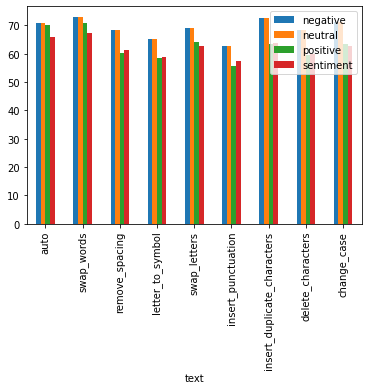

In [13]:
results_df.plot.bar(x="text")

### Emotion

In [14]:
tweets_df_adv_emot = pd.read_csv("data/tweets_adv_emot.csv", index_col = "index")

In [15]:
manual = list(tweets_df_adv_emot["emotion_manual"])
for text in texts:
    auto = list(tweets_df_adv_emot["emotion_" + text])
    f1_anger, f1_joy, f1_optimism, f1_sadness = f1_score(manual, auto, labels=labels_emotion, average=None)
    f1_emotion = f1_score(manual, auto, labels=labels_emotion, average='macro')
    results["anger"].append(round(f1_anger * 100, 1))
    results["joy"].append(round(f1_joy * 100, 1))
    results["optimism"].append(round(f1_optimism * 100, 1))
    results["sadness"].append(round(f1_sadness * 100, 1))
    results["emotion"].append(round(f1_emotion * 100, 1))

In [16]:
results_df = pd.DataFrame(results)
results_df

text  negative  neutral  ...  optimism  sadness  emotion
0                         auto      71.0     71.0  ...      27.9     52.6     53.3
1                   swap_words      73.1     73.1  ...      27.9     51.3     52.8
2               remove_spacing      68.2     68.2  ...      33.3     55.0     56.5
3             letter_to_symbol      65.2     65.2  ...      22.9     38.9     46.6
4                 swap_letters      69.0     69.0  ...      21.6     31.6     46.2
5           insert_punctuation      62.8     62.8  ...      20.0     35.0     47.9
6  insert_duplicate_characters      72.5     72.5  ...      26.3     47.4     51.8
7            delete_characters      68.2     68.2  ...      27.8     41.0     51.0
8                  change_case      71.1     71.1  ...      37.2     44.4     52.6

[9 rows x 10 columns]

In [93]:
results_df.to_latex(index=False)

'\\begin{tabular}{lrrrrrrrrr}\n\\toprule\n                       text &  negative &  neutral &  positive &  sentiment &  anger &  joy &  optimism &  sadness &  emotion \\\\\n\\midrule\n                       auto &      71.0 &     71.0 &      70.3 &       65.8 &   66.7 & 66.1 &      27.9 &     52.6 &     53.3 \\\\\n                 swap\\_words &      73.1 &     73.1 &      71.0 &       67.2 &   67.6 & 64.6 &      27.9 &     51.3 &     52.8 \\\\\n             remove\\_spacing &      68.2 &     68.2 &      60.2 &       61.2 &   69.6 & 68.2 &      33.3 &     55.0 &     56.5 \\\\\n           letter\\_to\\_symbol &      65.2 &     65.2 &      58.5 &       59.0 &   62.5 & 62.0 &      22.9 &     38.9 &     46.6 \\\\\n               swap\\_letters &      69.0 &     69.0 &      64.3 &       62.8 &   67.6 & 64.1 &      21.6 &     31.6 &     46.2 \\\\\n         insert\\_punctuation &      62.8 &     62.8 &      55.7 &       57.5 &   62.5 & 74.0 &      20.0 &     35.0 &     47.9 \\\\\ninsert\\_du

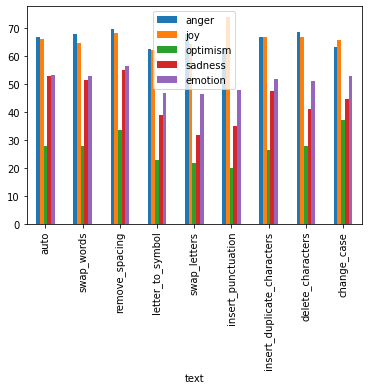

In [17]:
results_df.plot.bar(x="text", y=['anger', 'joy', 'optimism', 'sadness', 'emotion'])

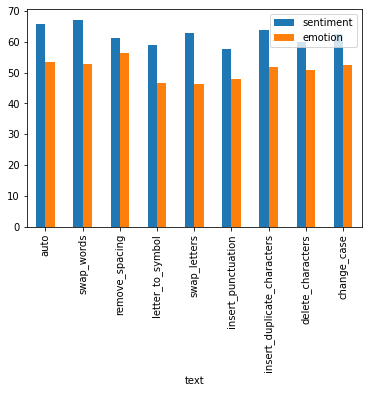

In [18]:
results_df.plot.bar(x='text', y=['sentiment', 'emotion'])

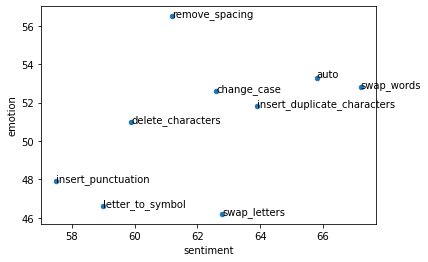

In [92]:
ax = results_df.plot.scatter(x='sentiment', y='emotion')
results_df[['sentiment','emotion','text']].apply(lambda row: ax.text(*row), axis=1);

## Pie charts

In [84]:
import matplotlib.pyplot as plt
def create_pie_chart(task, annotations):
    if task == "sentiment":
        negative_count = annotations.count('negative')
        neutral_count = annotations.count('neutral')
        positive_count = annotations.count('positive')
        plt.pie(x = [negative_count, neutral_count, positive_count], labels=labels_sentiment, autopct='%1.1f%%', pctdistance=0.25, labeldistance=0.5)
        plt.show()
    else:
        anger_count = annotations.count('anger')
        joy_count = annotations.count('joy')
        optimism_count = annotations.count('optimism')
        sadness_count = annotations.count('sadness')
        plt.pie(x = [anger_count, joy_count, optimism_count, sadness_count], labels=labels_emotion, autopct='%1.1f%%', pctdistance=0.35, labeldistance=0.55)
        plt.show()

In [66]:
tweets_df = pd.read_csv("data/tweets.csv", index_col = "index")
sent_manual = list(tweets_df["sentiment_manual"])
sent_auto = list(tweets_df["sentiment_auto"])
emot_manual = list(tweets_df["emotion_manual"])
emot_auto = list(tweets_df["emotion_auto"])

### Sentiment

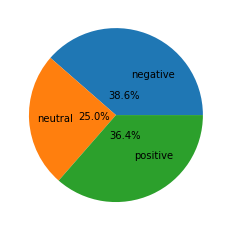

In [71]:
create_pie_chart("sentiment", sent_manual)

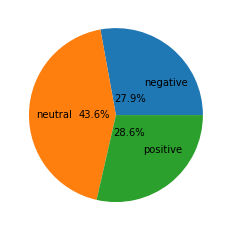

In [72]:
create_pie_chart("sentiment", sent_auto)

### Emotion

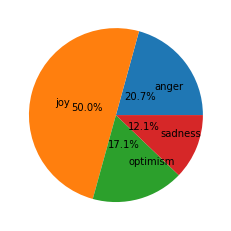

In [85]:
create_pie_chart("emotion", emot_manual)

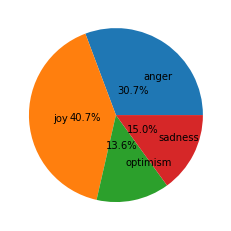

In [86]:
create_pie_chart("emotion", emot_auto)

## Wordclouds

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def create_wordcloud(text):
    wc = WordCloud(max_words=100,
        stopwords=STOPWORDS, width = 1000, height = 1000,
        repeat=True, background_color='white', colormap='Set2', random_state=1)
    text_str = " ".join(list(text))
    wc.generate(text_str)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc)
    plt.axis("off")

In [ ]:
tweets_df = pd.read_csv("data/tweets.csv", index_col = "index")

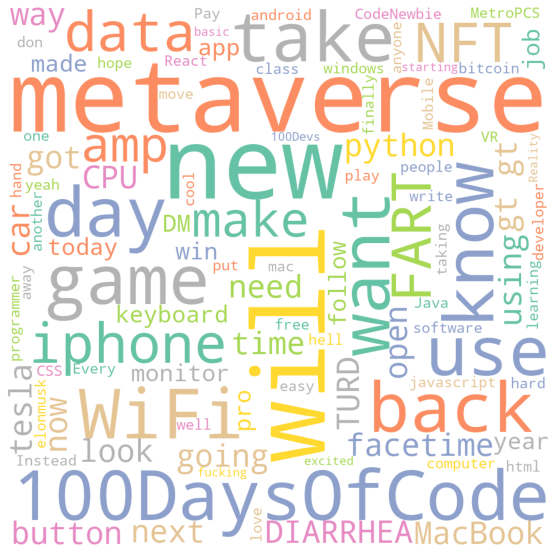

In [ ]:
create_wordcloud(tweets_df["text"])

### Sentiment

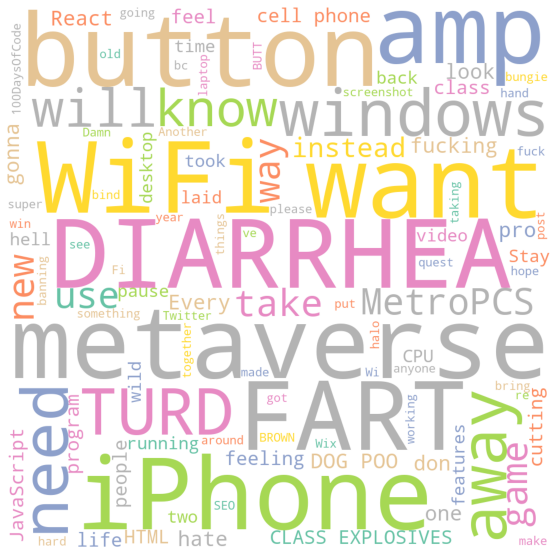

In [ ]:
create_wordcloud(tweets_df[tweets_df["sentiment_manual"] == "negative"]["text"])

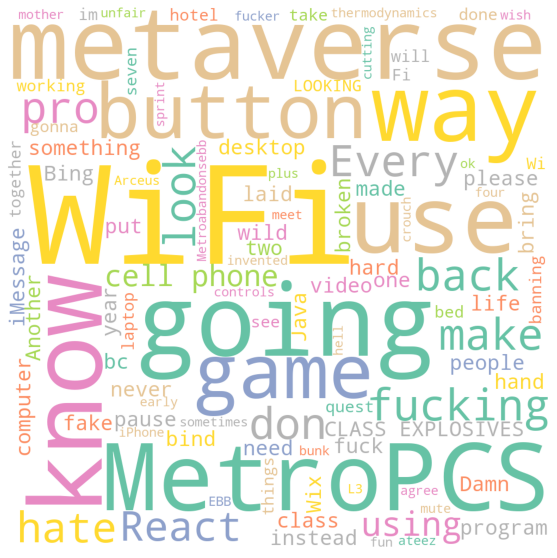

In [ ]:
create_wordcloud(tweets_df[tweets_df["sentiment_auto"] == "negative"]["text"])

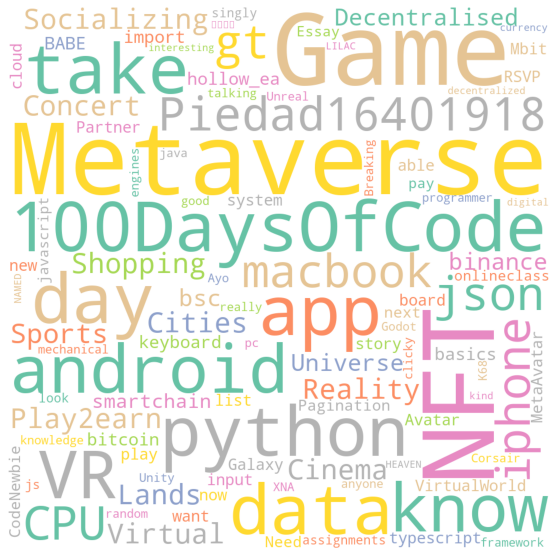

In [ ]:
create_wordcloud(tweets_df[tweets_df["sentiment_manual"] == "neutral"]["text"])

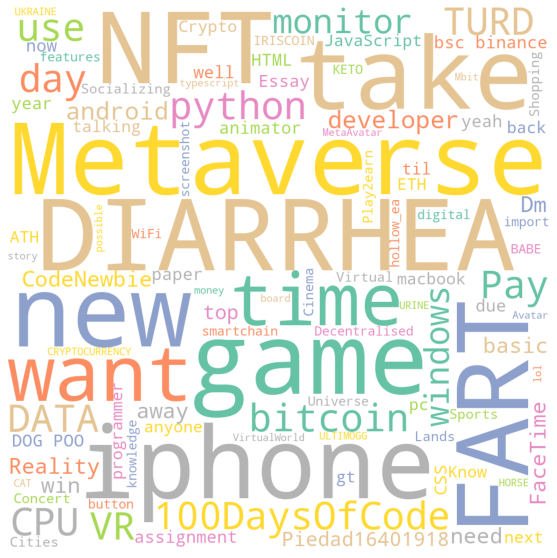

In [ ]:
create_wordcloud(tweets_df[tweets_df["sentiment_auto"] == "neutral"]["text"])

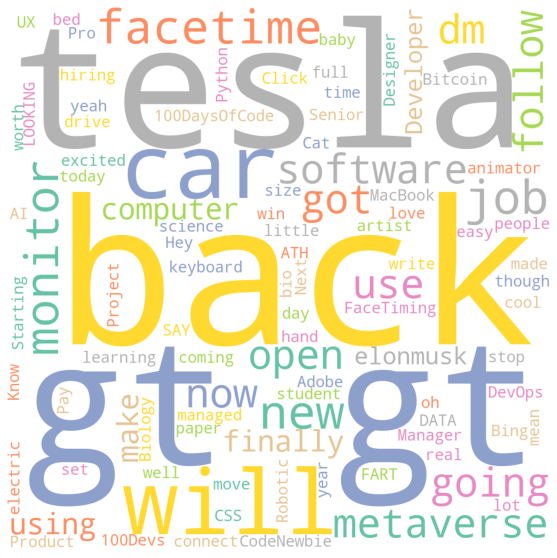

In [ ]:
create_wordcloud(tweets_df[tweets_df["sentiment_manual"] == "positive"]["text"])

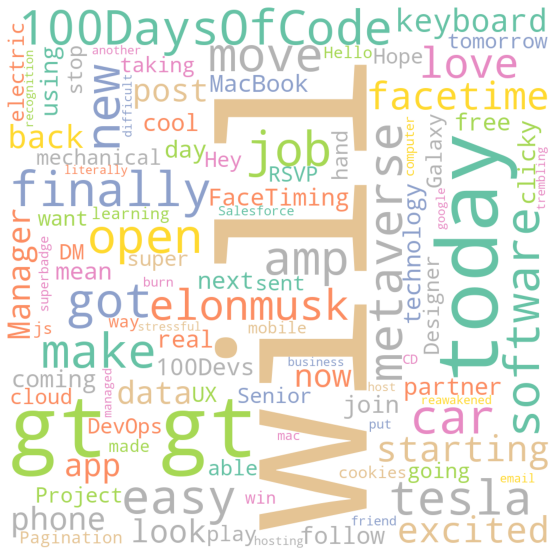

In [ ]:
create_wordcloud(tweets_df[tweets_df["sentiment_auto"] == "positive"]["text"])

### Emotion

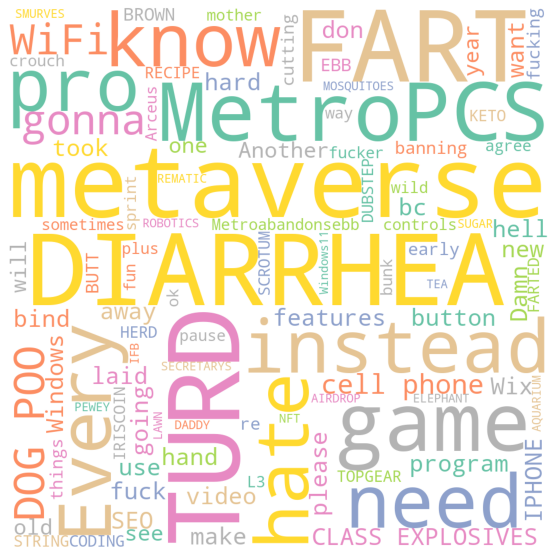

In [ ]:
create_wordcloud(tweets_df[tweets_df["emotion_manual"] == "anger"]["text"])

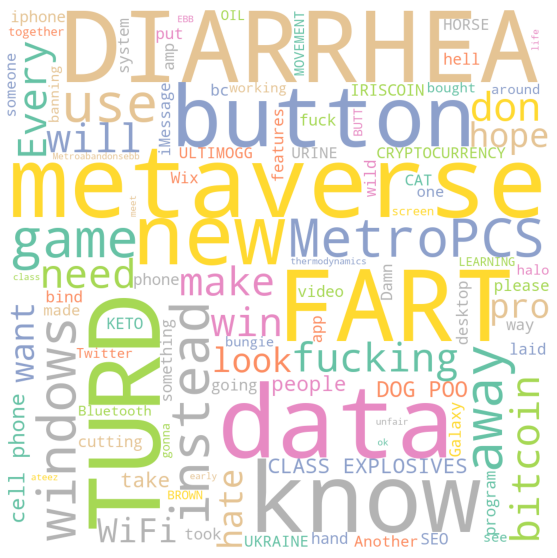

In [ ]:
create_wordcloud(tweets_df[tweets_df["emotion_auto"] == "anger"]["text"])

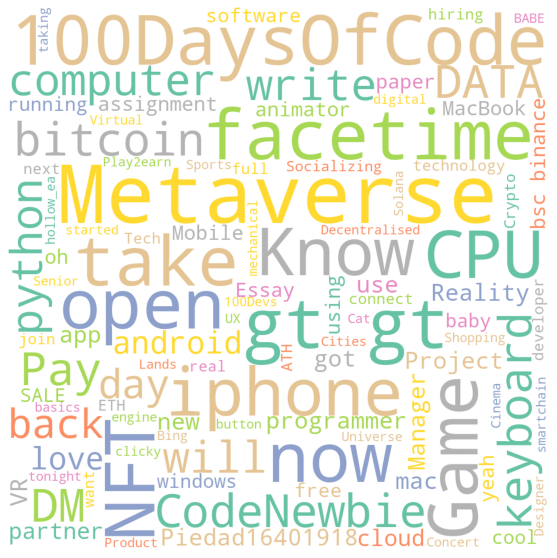

In [ ]:
create_wordcloud(tweets_df[tweets_df["emotion_manual"] == "joy"]["text"])

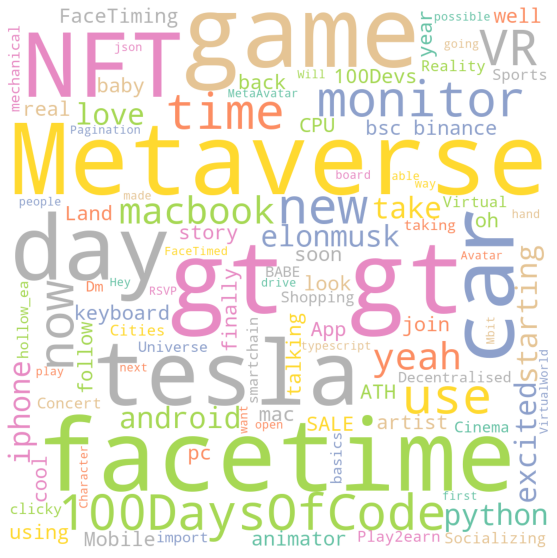

In [ ]:
create_wordcloud(tweets_df[tweets_df["emotion_auto"] == "joy"]["text"])

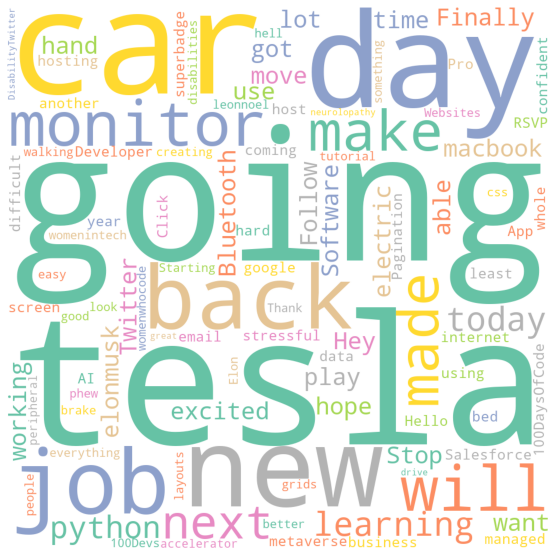

In [ ]:
create_wordcloud(tweets_df[tweets_df["emotion_manual"] == "optimism"]["text"])

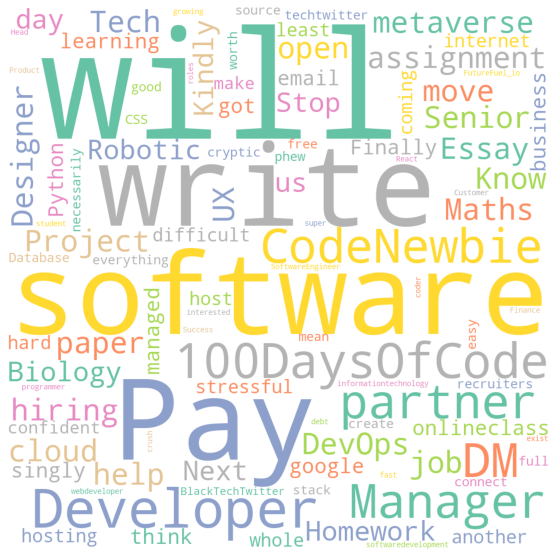

In [ ]:
create_wordcloud(tweets_df[tweets_df["emotion_auto"] == "optimism"]["text"])

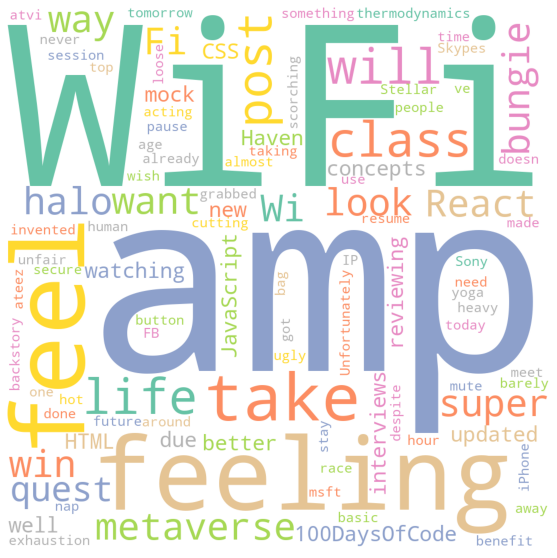

In [ ]:
create_wordcloud(tweets_df[tweets_df["emotion_manual"] == "sadness"]["text"])

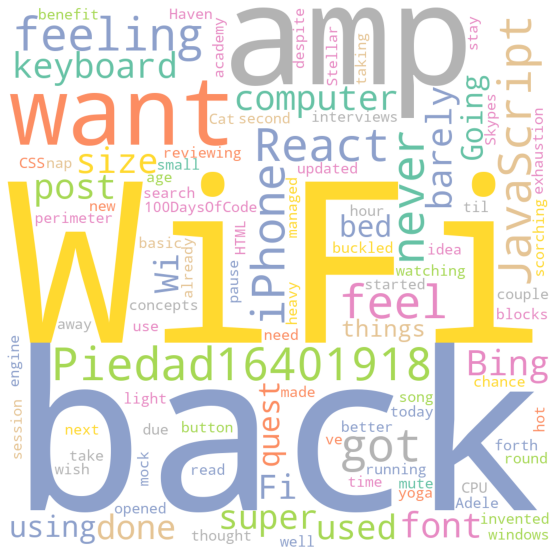

In [ ]:
create_wordcloud(tweets_df[tweets_df["emotion_auto"] == "sadness"]["text"])